## Ayudantía 6

### Profesor: Luis Cossio
### Ayudante: Gabriel Díaz

# Clasificador SVM (Máquinas de Vectores de Soporte)

## ¿Qué es un clasificador SVM?

SVM significa *Support Vector Machine*, o Máquina de Vectores de Soporte.  
Es un algoritmo supervisado de clasificación que busca **separar las clases de datos mediante un hiperplano óptimo**.

---

## Intuición básica:

- SVM intenta encontrar la **línea (en 2D)** o el **plano (en 3D+)** que **mejor separa los datos** de dos clases.
- Ese plano se llama **hiperplano de decisión**.
- Los **vectores más cercanos** a ese hiperplano se llaman **vectores de soporte**: determinan la posición del plano.
- El SVM **maximiza el margen** entre clases, es decir, intenta que las clases queden lo más separadas posible.

---

## Tipos de SVM

- **SVM lineal**: cuando los datos son separables con una línea o plano.
- **SVM no lineal**: cuando se requiere transformar los datos a un espacio de mayor dimensión (usando un *kernel*).

---

## ¿Qué es un kernel?

Un **kernel** es una función que transforma los datos para que sean separables.  
Ejemplos comunes:
- `'linear'`
- `'poly'` (polinómico)
- `'rbf'` (radial basis function, el más usado)
- `'sigmoid'`

---

## Ventajas del SVM

Funciona bien con datasets pequeños y de alta dimensión.  
Eficiente en problemas donde las clases no se superponen mucho.  
Se puede aplicar en clasificación binaria y multiclase.

---

## Desventajas

- Puede ser lento en datasets grandes.  
- Difícil de ajustar si las clases están solapadas.  
- Sensible a la elección del kernel y los hiperparámetros (`C`, `gamma`, etc.).

---


In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

| Clave           | Contenido                                                        |
| --------------- | ---------------------------------------------------------------- |
| `data`          | Matriz NumPy con las características (cada fila es un paciente)  |
| `target`        | Array con las etiquetas (0 = maligno, 1 = benigno)               |
| `feature_names` | Nombres de las 30 variables del dataset                          |
| `target_names`  | \['malignant', 'benign']                                         |


In [3]:
# print data(feature)shape
cancer.data.shape


(569, 30)

In [4]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [5]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


In [7]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


Bueno, se obtuvo una tasa de clasificación del 96,49%, considerada como una precisión muy buena.

Para una evaluación más detallada, también puede comprobar la precisión y la recuperación del modelo.

## Ejercicio para la casa:

### Comparar la frontera de decisión con otro modelo, como árbol de decisión. 

---

## Para graficar lo anterior usaremos 2 variables.

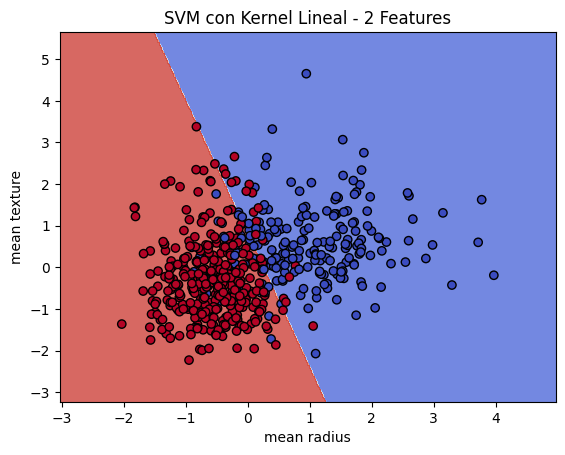

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Cargar datos
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Seleccionamos las dos primeras características
y = cancer.target

# Normalizamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Entrenar el modelo
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Crear una malla para graficar la frontera
h = 0.02  # paso de la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecimos sobre la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("SVM con Kernel Lineal - 2 Features")
plt.show()


---

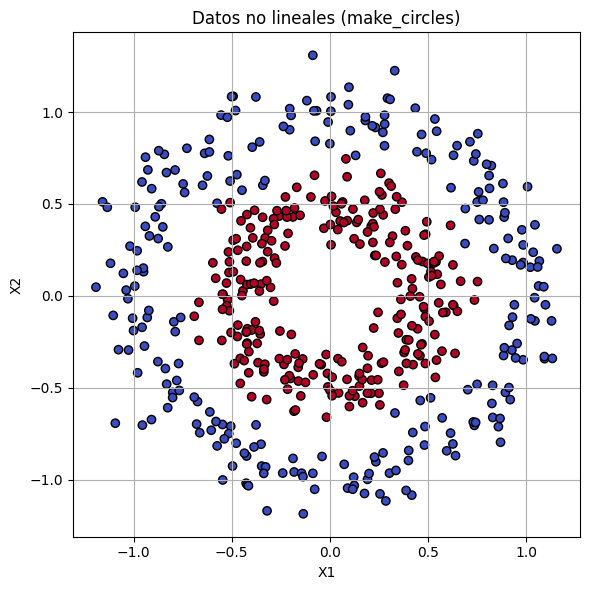

In [10]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Generar un dataset no lineal (datos en forma de círculos)
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# 2. Visualizar el dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Datos no lineales (make_circles)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# 3. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Entrenar un modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma controla la complejidad del modelo
svm_rbf.fit(X_train_scaled, y_train)

# 6. Hacer predicciones
y_pred = svm_rbf.predict(X_test_scaled)

# 7. Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[42  1]
 [ 1 56]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.98      0.98      0.98        57

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



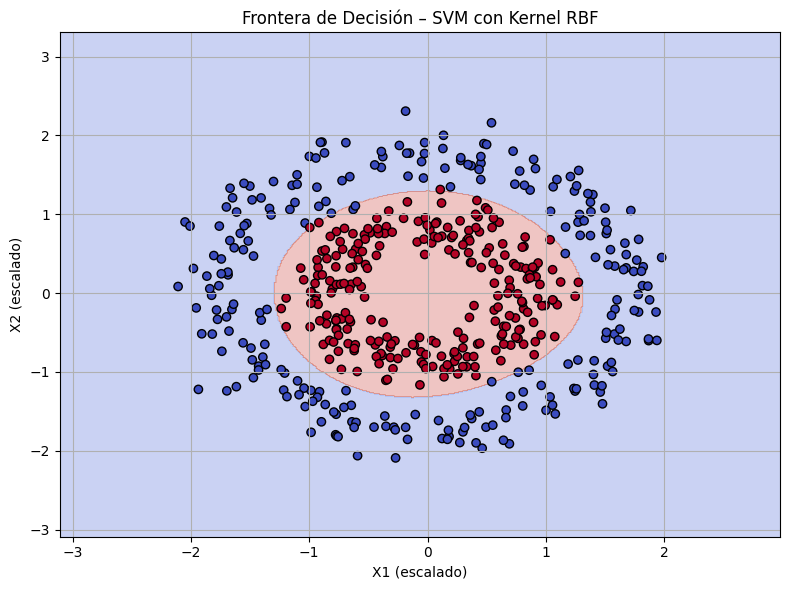

In [12]:
# 8. Visualizar la frontera de decisión

# Re-escala todo el conjunto de datos para graficar
X_scaled = scaler.transform(X)

# Crear una malla para graficar la frontera
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predecir sobre la malla
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Frontera de Decisión – SVM con Kernel RBF")
plt.xlabel("X1 (escalado)")
plt.ylabel("X2 (escalado)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Árboles vs SVM

Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       128
           1       0.73      0.83      0.77        87

    accuracy                           0.80       215
   macro avg       0.80      0.81      0.80       215
weighted avg       0.81      0.80      0.81       215


 SVM:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       128
           1       0.82      0.71      0.76        87

    accuracy                           0.82       215
   macro avg       0.82      0.80      0.81       215
weighted avg       0.82      0.82      0.82       215



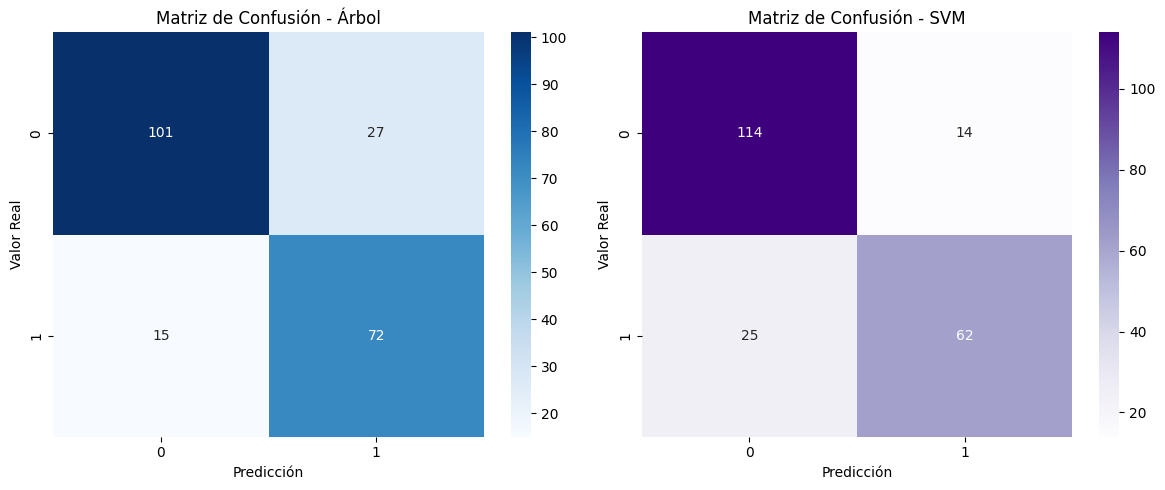

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (se ejecuta solo si tienes conexión)
df = sns.load_dataset('titanic')

# Selección de variables relevantes y eliminación de nulos
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
df = df[features + ['survived']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # codificación binaria

# Variables predictoras y objetivo
X = df.drop(columns='survived')
y = df['survived']

# División en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Árbol de decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Reportes
print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

print("\n SVM:")
print(classification_report(y_test, y_pred_svm))

# Comparar matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Matriz de Confusión - Árbol")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Valor Real")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples', ax=axs[1])
axs[1].set_title("Matriz de Confusión - SVM")
axs[1].set_xlabel("Predicción")
axs[1].set_ylabel("Valor Real")

plt.tight_layout()
plt.show()


### La base de datos nos dice, clase 0 = no sobrevivió. Clase 1 = sobrevivió.

In [14]:
df

,pclass,sex,age,sibsp,parch,fare,survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,0
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,1
889,1,0,26.0,0,0,30.0000,1
